Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not find a version that satisfies the requirement transfomers (from versions: none)
ERROR: No matching distribution found for transfomers


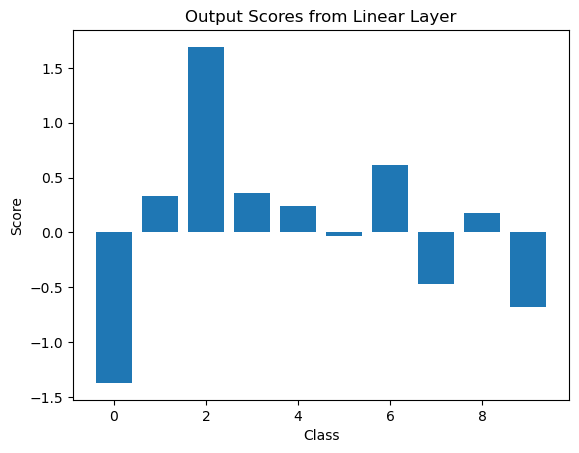

In [3]:
!pip install torch matplotlib transfomers

import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# Create a dummy input tensor to simulate a grayscale image (e.g., 28x28)
# Here we assume it's already flattened
torch_tensor_gray = torch.randn(1, 28 * 28)  # batch size 1, input size 784

# Define the model
model = nn.Linear(in_features=28 * 28, out_features=10)

# Move to CUDA if available
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = model.to(device)
torch_tensor_gray = torch_tensor_gray.to(device)  # This line was broken in your code

# Pass through the model
scores = model(torch_tensor_gray)

# Move to CPU for visualization
scores_cpu = scores.detach().cpu().squeeze()

# Plot the scores as a bar graph
plt.bar(range(10), scores_cpu)
plt.xlabel('Class')
plt.ylabel('Score')
plt.title('Output Scores from Linear Layer')
plt.show()


In [4]:

transform = transforms.toImage()
image_tensor = transform(np.array)

print(image_tensor.shape)

print(image_tensor.permute(1,2,0).shape)


plt.imshow(image_tensor)

plt.imshow(image_tensor.permute(1,2,0))

NameError: name 'transforms' is not defined

In [ ]:
import torch

w1 = torch.tensor([4.0], requires_grad=True)

x1 = torch.tensor([5.0], requires_grad=False)

y = torch.tensor([6.0], requires_grad=False)

L = torch.abs(w1 * x1 - y)

print(f"1 = {z.item()}, requires_grad = {L.requires_grad}")

L.backward()

print(f"d1/dw1 = {w1.grad}")

In [ ]:
#Numerical Stability example

original_values = torch.tensor([255,204,170], dtype=torch.uint8)
print(f"original values: {original_values}")

float_values = original_values.float() / 255
print(f"Scaled values: {float_values}")

print(f"original exp: {torch.exp(original_values)}")
print(f"Scaled exp: {torch.exp(float_values)}")

In [ ]:
transform = transforms.Compose([
    transforms.ToImage(),
    transforms.ToDType(torch.float32, scale=True)])

image_tensor = transform(pil_image)

print(image_tensor.max(), image_tensor.min())

In [ ]:
import torch.nn as nn 

l_h_layer = nn.Linear(in_features=3, out_features=4, bias=False)
h_o_layer = nn.Linear(in_features=4, out_features=1, bias=False)

model = nn.Sequential(
        l_h_layer,
        nn.ReLU(),
        h_o_layer,
)

input_data = torch.tensor([1.0, 2.0, 3.0], dtype=torch.float32)


prediction = model(input_data)

target = torch.tensor([11.], dtype=torch.float32)

loss_function = nn.L1loss()


loss_value = loss_function(target, prediction)

In [ ]:
import torch
import torch.nn as nn

layer = nn.Linear(in_features=4, out_features=1, bias=True)

for name, param in layer.named_parameters():
    print(f'{name}: {param:shape}')
    print(param)

x = torch.randn(5, 4)
output = layer(x)

print(output.shape)

#Synthectic data interpertation, this is part of the layer composition. THis is part of the layer architecture.
#Relu introduces nonlinearly, this helps to removes the waste. This removes the input layer.

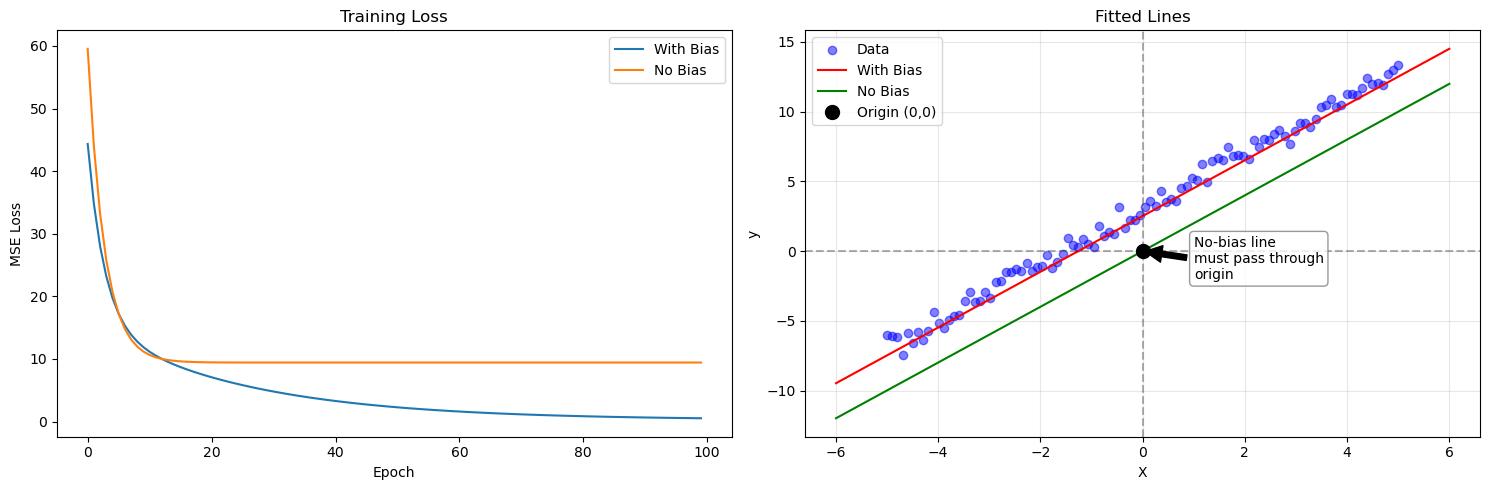

Model with bias:
Weight: 1.997
Bias: 2.511

Model without bias:
Weight: 1.997


In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

# Set random seed for reproducibility
torch.manual_seed(42)

# Generate some sample data that requires bias for better fitting
X = torch.linspace(-5, 5, 100).reshape(-1, 1)
# Create data with an intentional offset to demonstrate bias importance
y = 2 * X + 3 + torch.randn_like(X) * 0.5  # y = 2x + 3 + noise

# Model with bias
class LinearWithBias(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(in_features=1, out_features=1, bias=True)

    def forward(self, x):
        return self.linear(x)

# Model without bias
class LinearNoBias(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(in_features=1, out_features=1, bias=False)

    def forward(self, x):
        return self.linear(x)

# Training function
def train_model(model, X, y, epochs=100):
    optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
    criterion = nn.MSELoss()

    losses = []
    for epoch in range(epochs):
        optimizer.zero_grad()
        y_pred = model(X)
        loss = criterion(y_pred, y)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())

    return losses

# Train both models
model_with_bias = LinearWithBias()
model_no_bias = LinearNoBias()

losses_with_bias = train_model(model_with_bias, X, y)
losses_no_bias = train_model(model_no_bias, X, y)

# Plotting with enhanced origin visualization
plt.figure(figsize=(15, 5))

# Plot training losses
plt.subplot(1, 2, 1)
plt.plot(losses_with_bias, label='With Bias')
plt.plot(losses_no_bias, label='No Bias')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()

# Plot fitted lines with emphasized origin
plt.subplot(1, 2, 2)
with torch.no_grad():
    # Extend X range to better show intersection with origin
    X_extended = torch.linspace(-6, 6, 200).reshape(-1, 1)
    y_pred_bias = model_with_bias(X_extended)
    y_pred_no_bias = model_no_bias(X_extended)

plt.scatter(X, y, alpha=0.5, label='Data', color='blue')
plt.plot(X_extended, y_pred_bias, 'r-', label='With Bias')
plt.plot(X_extended, y_pred_no_bias, 'g-', label='No Bias')

# Emphasize the origin
plt.plot(0, 0, 'ko', markersize=10, label='Origin (0,0)')  # Large black dot at origin
plt.axhline(y=0, color='k', linestyle='--', alpha=0.3)  # Horizontal line
plt.axvline(x=0, color='k', linestyle='--', alpha=0.3)  # Vertical line

# Add annotation to highlight no-bias line passing through origin
plt.annotate('No-bias line\nmust pass through\norigin',
             xy=(0, 0), xytext=(1, -2),
             arrowprops=dict(facecolor='black', shrink=0.05),
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

plt.title('Fitted Lines')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print the learned parameters
print("Model with bias:")
print(f"Weight: {model_with_bias.linear.weight.item():.3f}")
print(f"Bias: {model_with_bias.linear.bias.item():.3f}")
print("\nModel without bias:")
print(f"Weight: {model_no_bias.linear.weight.item():.3f}")

In [ ]:
import torch

batch_size = 1
input_features = 4
output_features = 1

x = torch.randn(batch_size, input_features)
print(f"Input X: {X[0]}")

weights = torch.randn(input_features, output_features)
print(f"Weights w: {weights.squeeze()}")

print(f"Output using matrix multiplication: {output_matmul.item():.4f}")

layer = torch.nn_linear(in_features = input_features,
                        out_features = output_features,
                        bias=False)